In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats

from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

### 2.1) Data Ingestion and EDA

In [2]:
df_Pkg = pd.read_csv('Holiday_Package.csv')

In [3]:
df_Pkg

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [4]:
df_HPkg = df_Pkg.drop('Unnamed: 0',axis=1)

In [5]:
df_HPkg.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


### Basic EDA

In [6]:
df_HPkg.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [7]:
df_HPkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [8]:
df_HPkg.shape

(872, 7)

### Checking for Null Values

In [9]:
df_HPkg.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Checking the duplicated values

In [10]:
df_HPkg.duplicated().sum()

0

### Proportion in the Target classes

In [11]:
df_HPkg.select_dtypes(include='object').head()

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no


In [12]:
df_HPkg.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [13]:
df_HPkg.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

### Encoding the object variables

for feature in df_HPkg.columns:
    if df_HPkg[feature].dtype == 'object':
        print('\n')
        print('Feature:',feature)
        print(pd.Categorical(df_HPkg[feature].unique()))
        print(pd.Categorical(df_HPkg[feature].unique()).codes)
        df_HPkg[feature] = pd.Categorical(df_HPkg[feature]).codes

In [14]:
df_HPkg = pd.get_dummies(df_HPkg, columns=['foreign'], drop_first=True)
df_HPkg

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,no,48412,30,8,1,1,0
1,yes,37207,45,8,0,1,0
2,no,58022,46,9,0,0,0
3,no,66503,31,11,2,0,0
4,no,66734,44,12,0,2,0
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,1
868,yes,32137,48,8,0,0,1
869,no,25178,24,6,2,0,1
870,yes,55958,41,10,0,1,1


In [15]:
print(pd.Categorical(df_HPkg['Holliday_Package'].unique()))
print(pd.Categorical(df_HPkg['Holliday_Package'].unique()).codes)
df_HPkg['Holliday_Package'] = pd.Categorical(df_HPkg['Holliday_Package']).codes

['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [16]:
df_HPkg.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


### Univariate Analysis

In [17]:
df_HPkg.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign_yes'],
      dtype='object')

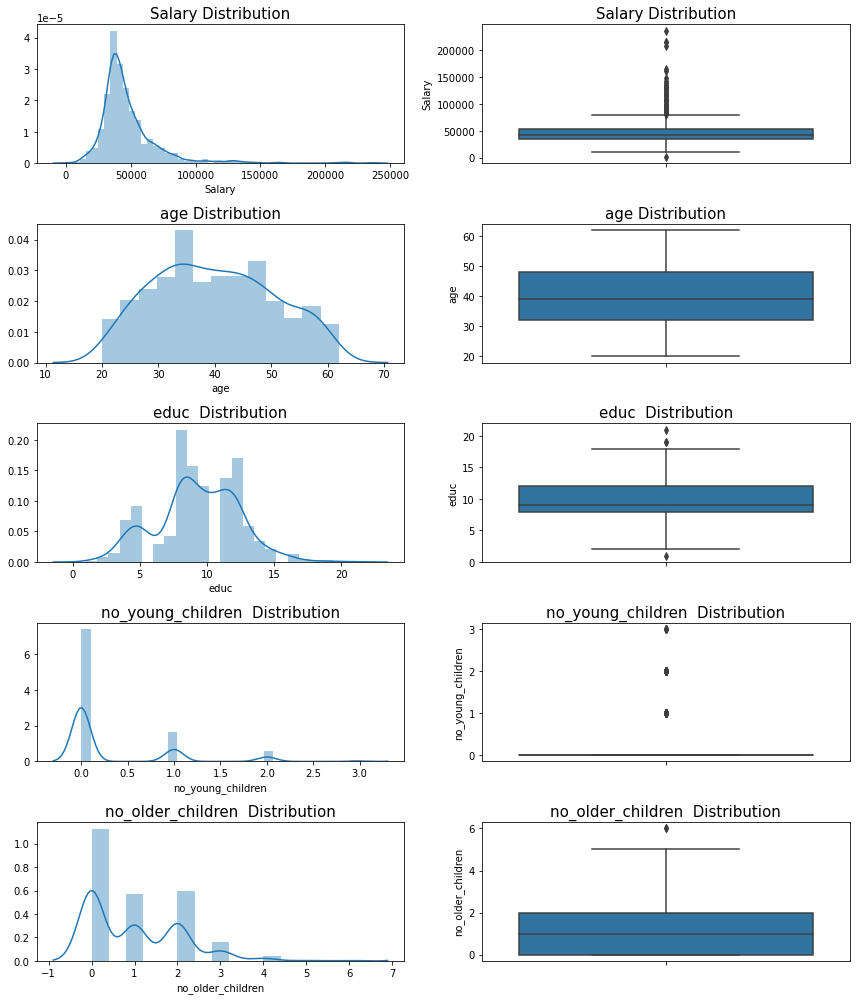

In [18]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df_HPkg['Salary'] , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=15)

a = sns.boxplot(df_HPkg['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df_HPkg['age'] , ax=axes[1][0])
a.set_title("age Distribution",fontsize=15)

a = sns.boxplot(df_HPkg['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=15)

a = sns.distplot(df_HPkg['educ'] , ax=axes[2][0])
a.set_title("educ  Distribution",fontsize=15)

a = sns.boxplot(df_HPkg['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ  Distribution",fontsize=15)

a = sns.distplot(df_HPkg['no_young_children'] , kde_kws={'bw': 0.1}, ax=axes[3][0])
a.set_title("no_young_children  Distribution",fontsize=15)

a = sns.boxplot(df_HPkg['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children  Distribution",fontsize=15)

a = sns.distplot(df_HPkg['no_older_children'] , ax=axes[4][0])
a.set_title("no_older_children  Distribution",fontsize=15)

a = sns.boxplot(df_HPkg['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children  Distribution",fontsize=15)

plt.tight_layout()
plt.show()

### Bivariate Analysis

### Boxplot

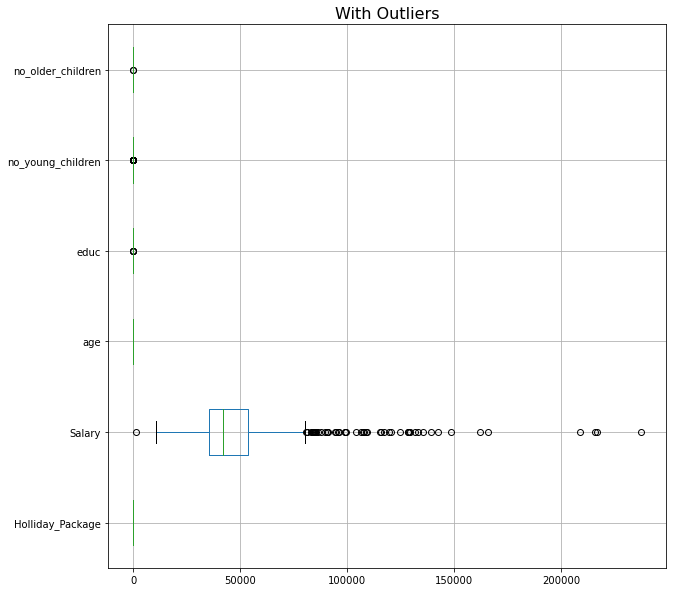

In [19]:
cont=df_HPkg.dtypes[(df_HPkg.dtypes!='uint8') & (df_HPkg.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_HPkg[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [21]:
for column in df_HPkg[cont].columns:
    lr,ur=remove_outlier(df_HPkg[column])
    df_HPkg[column]=np.where(df_HPkg[column]>ur,ur,df_HPkg[column])
    df_HPkg[column]=np.where(df_HPkg[column]<lr,lr,df_HPkg[column])

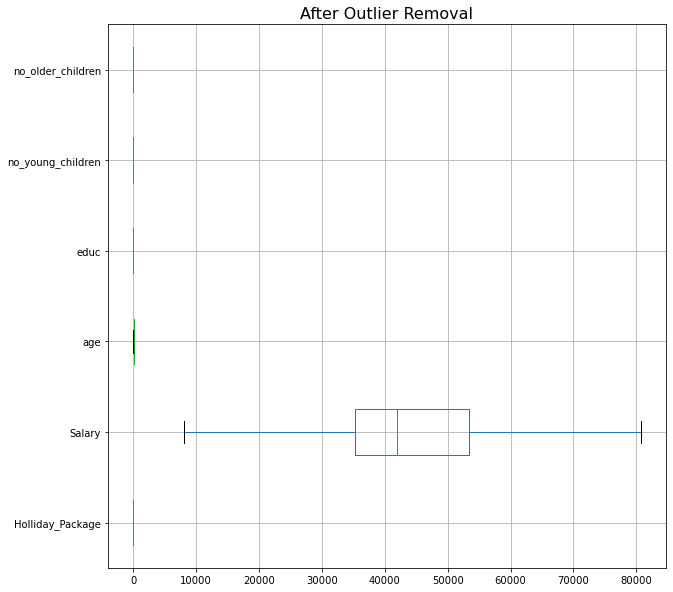

In [22]:
plt.figure(figsize=(10,10))
df_HPkg[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

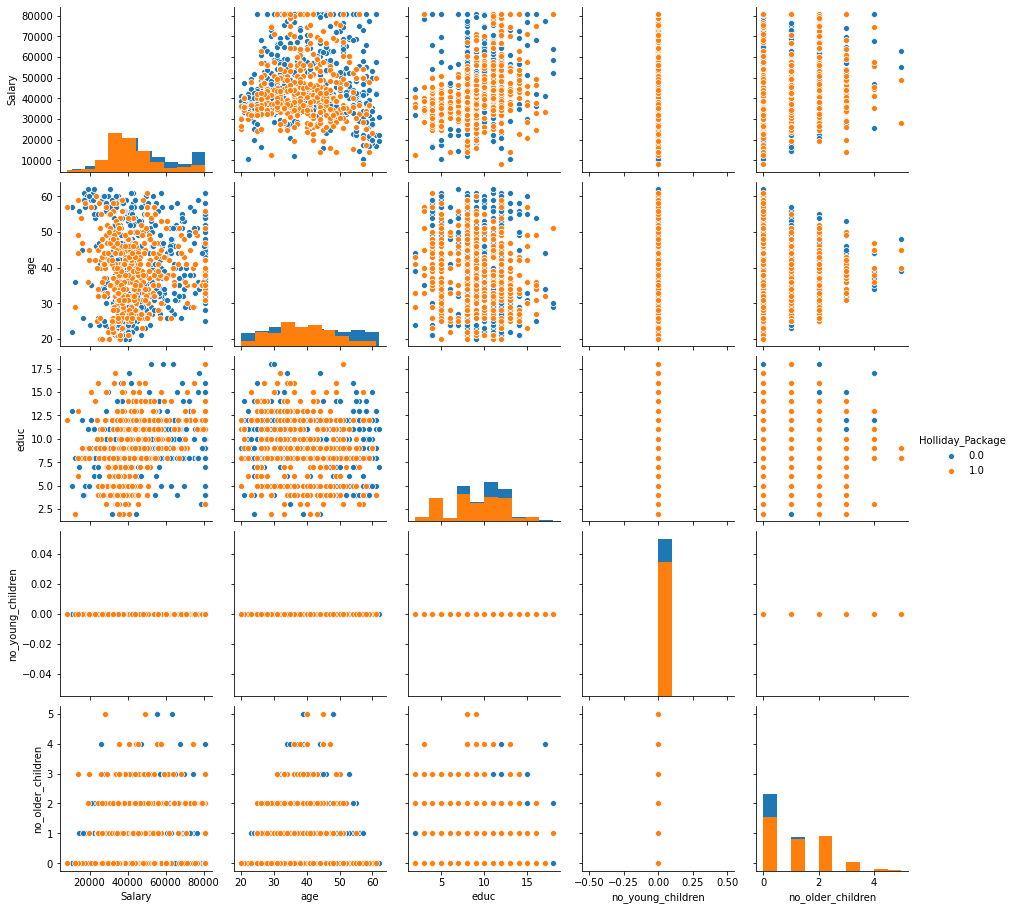

In [23]:
sns.pairplot(df_HPkg.iloc[:,0:6], diag_kind='hist', hue='Holliday_Package')  
plt.show()

### Correlation

<AxesSubplot:>

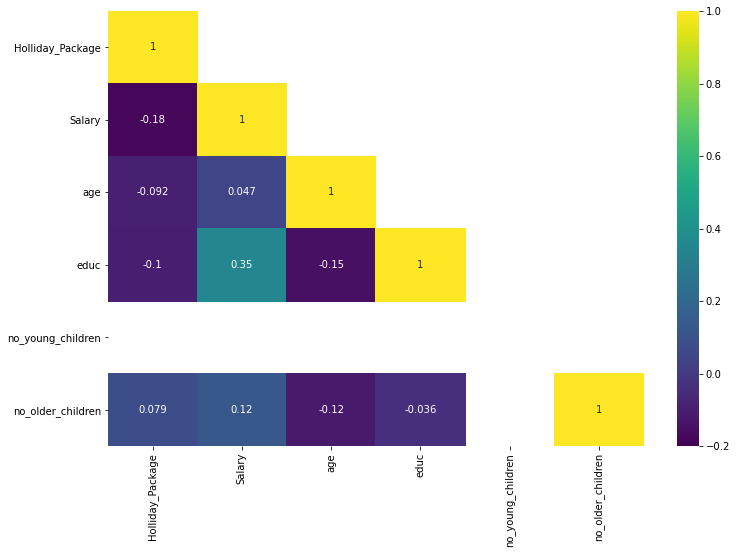

In [24]:
df_HPkg_attr = (df_HPkg[cont])
plt.figure(figsize=(12,8))
sns.heatmap(df_HPkg_attr.corr(),annot=True,mask=np.triu(df_HPkg_attr.corr(),+1),cmap='viridis',vmin=-0.2,vmax=1)

# 2.2) Data Split: Splitting the data into test and train (70:30)

In [25]:
# Copy all the predictor variables into X dataframe
X = df_HPkg.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df_HPkg[['Holliday_Package']]

In [26]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0
1,37207.0,45.0,8.0,0.0,1.0,0
2,58022.0,46.0,9.0,0.0,0.0,0
3,66503.0,31.0,11.0,0.0,0.0,0
4,66734.0,44.0,12.0,0.0,2.0,0


In [27]:
y.head()

,Holliday_Package
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [29]:
y_train.value_counts(normalize=True)

Holliday_Package
0.0                 0.534426
1.0                 0.465574
dtype: float64

In [30]:
y_test.value_counts(normalize=True)

Holliday_Package
0.0                 0.553435
1.0                 0.446565
dtype: float64

### Logistic Regression Model

In [31]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.8s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

### Predicting on Training and Test dataset

In [32]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [33]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.696807,0.303193
1,0.332213,0.667787
2,0.620128,0.379872
3,0.686886,0.313114
4,0.354964,0.645036


### Model Evaluation

In [34]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6409836065573771

### AUC and ROC for the training data

AUC: 0.667


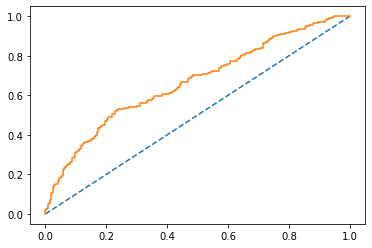

In [35]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.667


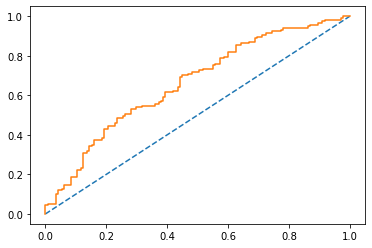

In [36]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [37]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6297709923664122

### Confusion Matrix for the training data

In [38]:
confusion_matrix(y_train, ytrain_predict)

array([[265,  61],
       [158, 126]], dtype=int64)

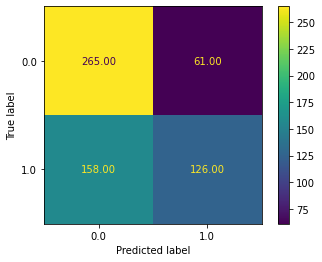

In [39]:
plot_confusion_matrix(model,X_train,y_train,values_format='0.2f');

In [40]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.63      0.81      0.71       326
         1.0       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



### Confusion Matrix for test data

In [41]:
confusion_matrix(y_test, ytest_predict)

array([[113,  32],
       [ 65,  52]], dtype=int64)

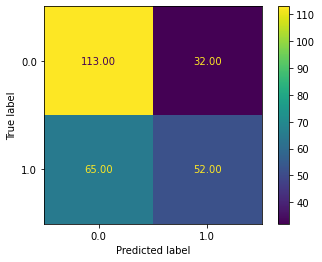

In [56]:
plot_confusion_matrix(model,X_test,y_test, values_format='.2f');

In [43]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.63      0.78      0.70       145
         1.0       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



### LDA Model

In [44]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Prediction

In [45]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Probability prediction for the training and test data

In [46]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [47]:
pred_prob_train[:,1]

array([0.29232736, 0.71218516, 0.25941094, 0.32072989, 0.48465835,
       0.6589039 , 0.37617241, 0.3215668 , 0.21855144, 0.44852479,
       0.34499238, 0.24274809, 0.3626753 , 0.38323241, 0.46971577,
       0.70744216, 0.82618411, 0.41298232, 0.42611419, 0.74640861,
       0.53722701, 0.2076308 , 0.49742148, 0.41181601, 0.33751753,
       0.41312542, 0.44985376, 0.34497108, 0.75805699, 0.32832053,
       0.68478009, 0.70307903, 0.43421205, 0.31621611, 0.42003704,
       0.37019078, 0.41712146, 0.38318837, 0.34120849, 0.35763096,
       0.38256474, 0.48738393, 0.37220926, 0.67726743, 0.32788312,
       0.73236176, 0.56328541, 0.39077477, 0.38782118, 0.46711305,
       0.41904625, 0.38570596, 0.49491867, 0.36655139, 0.80610163,
       0.40853665, 0.48606621, 0.22836863, 0.73551411, 0.45068862,
       0.26261954, 0.44939141, 0.49185238, 0.71908308, 0.35292084,
       0.32707741, 0.48779143, 0.74857005, 0.22200694, 0.46730359,
       0.3384402 , 0.30639497, 0.46221896, 0.70205593, 0.39421

### Model Evaluation

In [48]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6426229508196721

### AUR ROC score Training data

AUC: 0.667


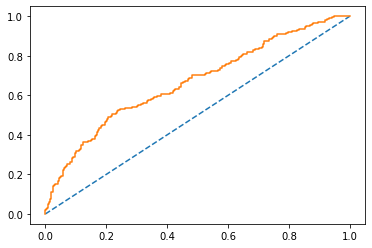

In [49]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [50]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6297709923664122

### AUR ROC score Test data

AUC: 0.667


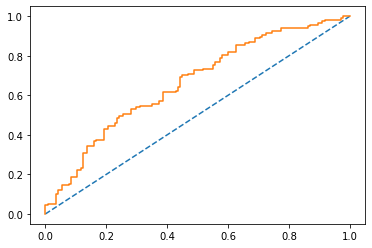

In [51]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [52]:
confusion_matrix(y_train, ytrain_predict)

array([[265,  61],
       [158, 126]], dtype=int64)

In [53]:
confusion_matrix(y_test, ytest_predict)

array([[113,  32],
       [ 65,  52]], dtype=int64)

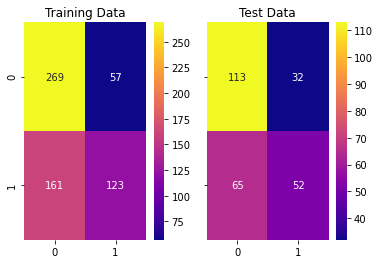

In [58]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='plasma',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [55]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.63      0.83      0.71       326
         1.0       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.63      0.78      0.70       145
         1.0       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Linear Regression Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
round(data,2)